In [2]:

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42) 

In [3]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [4]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [5]:
circles.label.value_counts()

,count
label,
1,500
0,500


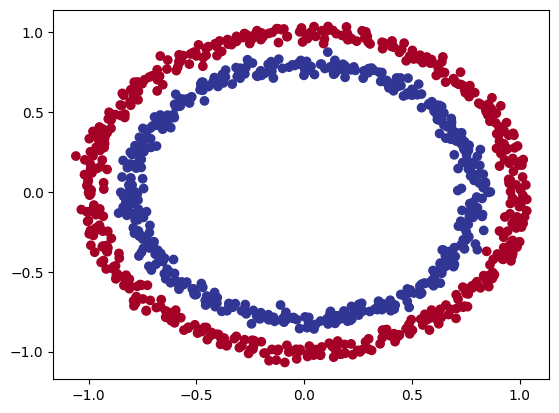

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
X.ndim, y.ndim, X.dtype, y.dtype, X.shape, y.shape

(2, 1, dtype('float64'), dtype('int64'), (1000, 2), (1000,))

In [8]:
type(X)

numpy.ndarray

In [9]:
import torch
from torch import nn
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset

In [10]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [13]:
X.device

device(type='cpu')

In [14]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)

        self.loss_fn = nn.BCEWithLogitsLoss()
        self.criteria = torch.optim.SGD(model_0.parameters(), lr=0.01)

    def forward(self, x):
        return self.layer2(self.layer1(x))

model_0 = CircleModelV1().to(device)
model_0

NameError: name 'model_0' is not defined

In [15]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2852,  0.1415],
                      [-0.1709, -0.0158],
                      [ 0.7010, -0.3727],
                      [ 0.5727, -0.1627],
                      [-0.3749, -0.4657]])),
             ('0.bias', tensor([-0.6938, -0.0989, -0.7015, -0.5576, -0.0697])),
             ('1.weight',
              tensor([[-0.1955, -0.3862,  0.0394, -0.2296, -0.3550]])),
             ('1.bias', tensor([0.0227]))])

In [17]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
    print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
    print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
    print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.3786],
        [0.4838],
        [0.1632],
        [0.4394],
        [0.2586],
        [0.3221],
        [0.5424],
        [0.5048],
        [0.1595],
        [0.4919]])

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [18]:
loss_fn = nn.BCEWithLogitsLoss()
criteria = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [19]:
def accuracy(y_true, y_pred):
    return torch.eq(y_true, y_pred).sum().item() / len(y_true)

In [20]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)
y_logits

tensor([[0.3786],
        [0.4838],
        [0.1632],
        [0.4394],
        [0.2586],
        [0.3221],
        [0.5424],
        [0.5048],
        [0.1595],
        [0.4919],
        [0.3817],
        [0.4095],
        [0.5292],
        [0.1379],
        [0.1430],
        [0.4256],
        [0.4933],
        [0.3373],
        [0.3237],
        [0.2735],
        [0.4878],
        [0.4374],
        [0.2922],
        [0.2970],
        [0.5420],
        [0.5172],
        [0.1258],
        [0.3646],
        [0.1317],
        [0.1542],
        [0.4949],
        [0.5444],
        [0.4027],
        [0.1987],
        [0.3880],
        [0.4706],
        [0.4197],
        [0.1416],
        [0.1718],
        [0.1423],
        [0.2803],
        [0.1788],
        [0.4895],
        [0.2369],
        [0.4120],
        [0.4817],
        [0.2788],
        [0.4907],
        [0.4513],
        [0.2963],
        [0.4311],
        [0.4198],
        [0.3924],
        [0.2084],
        [0.4797],
        [0

In [21]:
probs = torch.sigmoid(y_logits)
probs

tensor([[0.5935],
        [0.6186],
        [0.5407],
        [0.6081],
        [0.5643],
        [0.5798],
        [0.6324],
        [0.6236],
        [0.5398],
        [0.6205],
        [0.5943],
        [0.6010],
        [0.6293],
        [0.5344],
        [0.5357],
        [0.6048],
        [0.6209],
        [0.5835],
        [0.5802],
        [0.5680],
        [0.6196],
        [0.6076],
        [0.5725],
        [0.5737],
        [0.6323],
        [0.6265],
        [0.5314],
        [0.5902],
        [0.5329],
        [0.5385],
        [0.6213],
        [0.6328],
        [0.5993],
        [0.5495],
        [0.5958],
        [0.6155],
        [0.6034],
        [0.5353],
        [0.5428],
        [0.5355],
        [0.5696],
        [0.5446],
        [0.6200],
        [0.5590],
        [0.6016],
        [0.6181],
        [0.5692],
        [0.6203],
        [0.6109],
        [0.5735],
        [0.6061],
        [0.6034],
        [0.5969],
        [0.5519],
        [0.6177],
        [0

In [22]:
y_preds = probs.round()

In [23]:
y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [36]:
# Train loop

epochs = 100

for epoch in range(epochs):
    model_0.train()
    logits = model_0(X_train)
    loss = loss_fn(torch.squeeze(logits), y_train)
    print("**Train**")
    print(loss)
    criteria.zero_grad()
    loss.backward()

    criteria.step()

    model_0.eval()
    with torch.inference_mode():
        logits = model_0(X_test)

        loss = loss_fn(torch.squeeze(logits), y_test)
        print("**Test**")
        print(loss)
        print(accuracy(y_test, logits.round().reshape(200)))
        print(y_test)
        print(logits.round())

**Train**
tensor(0.6946, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
**Test**
tensor(0.7003)
0.5
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])
t

In [37]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    )
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

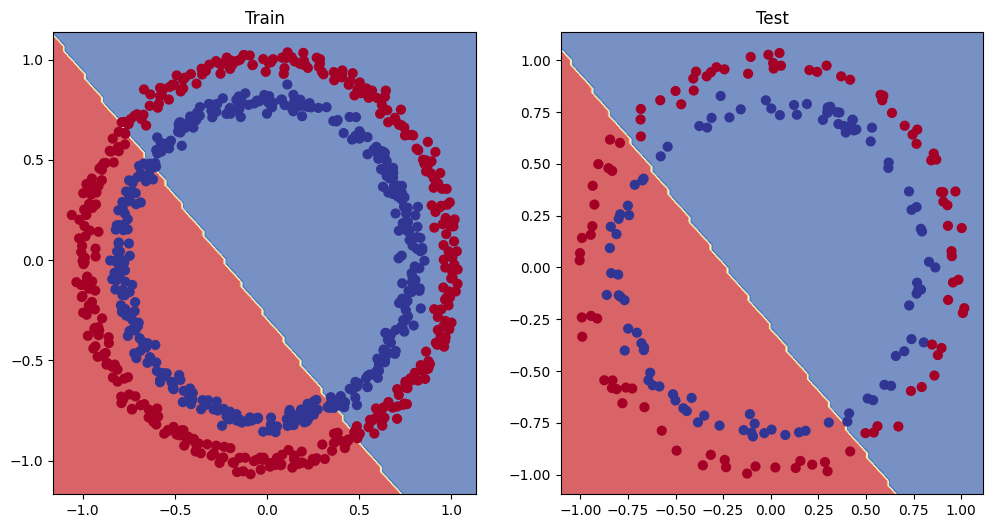

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)